# Regression Linear Model II: Ridge 

In this notebook we study the second linear model for regression, i.e., the Ridge regression or Ridge regularization. We will follow closely the other notebooks where we study linear models and therefore we will start with the theoretical background giving the details of how it works in theory. Again, we will use the notation we already set in the introductionary file for Supervised Learning (Supervised_Learning.ipynb). This notebook is structured as follows

- [Theoretical Analysis:](#s1)
    - [Algorithm](#s1.1)
    - [Geometrical Interpretation](#s1.2)
    
- [Implementation in Python](#s2)
- [Mini-challenge](#s3)

##  <a class="anchor" id='s1'>Theoretical Analysis</a> 

Ridge linear regression is a regularization method for linear regression. There are basically two main reasons why we are often not satisfied with the OLS estimates: 

- The first is _prediction accuracy_: the least squares estimates often have low bias but large variance. Prediction accuracy can sometimes be improved by shrinking or setting some coefficients to zero. By doing so we sacrifice a little bit of bias to reduce the variance of the predicted values, and hence may improve the overall prediction accuracy

- The second reason is _interpretation_. With a large number of predictors, we often would like to determine a smaller subset that exhibit the strongest effects. In order to get the “big picture,” we are willing to sacrifice some of the small details


The regularization methods get into the game in general when our OLS model is too complex for modelising the real dataset. That it means, for example, that among all the features we have, some of them suffers from multi-collinearity. In general, in more mathematical terms, regularization method are used when $p>N$ that makes the matrix $X^TX$ not invertible.




Similarly to the case of the OLS linear model we have to minimize a risk function such that our predicted model will be

\begin{align*}
\mathcal{R}(f)=E\left[L(f(x),y)\right]=\int L(f(x),y)dP(x,y)
\end{align*}

where $L(f(x),y)$ is the  loss function and $P(x,y)$ is the joint probability distribution.  The ultimate goal of a learning algorithm is to find a function $\hat{f}$ for which the risk $\mathcal{R}(\hat{f})$ is minimal, among the fixed class of function $\mathcal{H}$:

\begin{align*}
\hat{f}=\arg\min_{f\in\mathcal{H}} \mathcal{R}(f)
\end{align*}

Since the statistician cannot compute the expectation (and thus the risk) because he does not know the distribution $P(x,y)$, it's common to replace the risk with an estimatore of the risk, called the empirical risk:

\begin{align*}
\hat{\mathcal{R}}(f)=\frac{1}{N}\sum_{i=1}^NL(f(x_i),y_i)
\end{align*}

where $x_i$ is the row vector if the $i$-th observation and $y_i$ the output variable of the associated input row. We seek for a function:

\begin{align*}
\hat{f}=\arg\min_{f\in\mathcal{H}} \hat{\mathcal{R}}(f)
\end{align*}

<a id='s1.1'></a>
### Algorithm

The algorithm of Ridge linear regression work by modifying the risk function bby adding penalty terms which play the role of a Lagrangian multiplier and turning the problem of minimizing the undeformed risk function to the problem of  minimize a functional subject to a constraint. With this criterion the coefficient of the linear model are not treated on same level but some of them are shrinked near to zero. 

The linear function describing the dataset is still linear

\begin{align*}
f(x_i)=\theta_0+\sum_{j=0}^px_{ij}\theta_j=\theta\cdot X=f(X)
\end{align*}

where we show either the component and the compact for of the expression. The OLS risk function is modify as

\begin{align*}
\hat{\mathcal{R}}(\theta)=\sum_{i=1}^N(y_i-\theta_0-\sum_{j=1}^px_{ij}\theta_j)^2+\lambda\sum_{j=0}^p\theta_j^2=||Y-f(X)||^2 +\lambda\,\theta^T\theta=||Y-f(X)||^2 +\lambda||\theta||^2
\end{align*}

Therefore the predicted model will give the following coefficient

\begin{align*}
\hat{\theta}=\arg\min_{\theta}\left\{||Y-f(X)||^2 +\lambda||\theta||^2\right\}
\end{align*}

Or, in an equivalent way we can write the ridge problem as the minimizing constraint problem

\begin{align*}
\hat{\theta}&=\arg\min_{\theta}\left\{||Y-f(X)||^2\right\}\\
\theta^T&\theta\le t(\lambda)
\end{align*}

where $t(\lambda)$ is a paramters in one-to-one correpondence with $\lambda>0$, which is the complexity parameter that controls the amount of shrinking: the larger the value of $\lambda$, the greater the amount of shrinkage.

When there are many correlated variables in a linear regression model, their coefficients can become poorly determined and exhibit high variance. A wildly large positive coefficient on one variable can be canceled by a similarly large negative coefficient on its correlated cousin. By imposing a size constraint on the coefficients this problem is alleviated.

The solution to the constraint problem is still analytic as in the OLS model, and it reads

\begin{align*}
\hat{\theta}=\left(X^TX+\lambda I\right)^{-1}X^Ty
\end{align*}

where $I$ is a $p\times p$ identity matrix. The solution adds a positive constant to the diagonal of $X^TX$ before inversion. This makes the problem nonsingular, even if $X^TX$ is not of full rank, and was the main motivation for ridge regression when it was first introduced in statistics. The below picture explains how Ridge regression acts

<div>
<img width=400 src='images/ridge.png' /> 
</div>

The picture simply shows the what a constraint minimizing problem works: the minimial of entire deformed function is where the level curves of the two functions are tangent each other, or, equivalently, the two gradient vectors are parallel each other. The meaning and amount of shrinkage will be more clear after the next section.

<a id='s1.2'></a>
### Geometrical Interpretation

In order to understand the geometrical intepretation of the Ridge regularization we should recall the __singular value decomposition (SVD)__ of the input matrix $X$. The SVD of the $N\times p$ matrix $X$ has the form:

\begin{align*}
X=UDV^T
\end{align*}

where U and V are $N\times p$ and $p\times p$ orthogonal matrices, with the columns of $U$ spanning the column space of $X$, and the columns of $V$ spanning the row space. $D$ is a $p\times p$ diagonal matrix, with diagonal entries $d_1\ge d_2\ge\cdots\ge d_p\ge 0$ called the singular values of $X$. If one or more values $d_j=0$, $X$ is singular.

For example, using the SVD we can write the OLS fitted vector, after some manipulation, as

\begin{align*}
X\hat{\theta}=UU^Ty
\end{align*}

Note that $U^Ty$ are the coordinates of $y$ with respect to the orthonormal basis $U$. The above expression simply tells us that the predicted $\hat{y}$ is the expansion of the training $y$ on the basis $U$ spanning the column space of $X$. 

In the Ridge solution we have (usign the solution we found in the previous section)

\begin{align*}
X\hat{\theta}=\sum_{j=1}^pu_j\frac{d_j^2}{d_j^2+\lambda}u_j^Ty
\end{align*}

where $u_j$ are the columns of $U$. We can notice that in this case we have a similar intepretation of projection and expansion with respect to the orthornormal basis $U$. But here, each direction is weighted and shrinked bt the factor $\frac{d_j^2}{d_j^2+\lambda}\le 1$. This means that, first of all, the greater is $\lambda$ the greater will be the shrinkage, and second, that the amount of shrinkage will be higher for the coorindates of baisis vectors with smaller $d_j^2$.

So, the question now is, what does it means and where does it come from a small value of $d_j$ ? The SVD of $X$ is another way of expressing the _principal component analysis_ (PCA) of the variables in $X$. The eigen decomposition of $X^TX$ reads


\begin{align*}
X^TX=VD^2V^T
\end{align*}

The columns of $V$ are the eigenvectors $v_j$ and are also called principal component directions of $X$. The first principal component direction $v_a$ has the property that $z_1=Xv_1$ has the largest sample variance among all the normalized linear combinations of the columns of $X$. This sample variance is

\begin{align*}
\text{Var}(z_1)=\frac{d_1^2}{N}
\end{align*}

and in fact $z_1=Xv_1=u_1d_1$. The derived variable $z_1$ is called the first principal component of $X$, and hence $u_1$ is the normalized first principal components. Hence the small singular values $d_j$ correspond to directions in the column space of $X$ having small variance, and ridge regression shrinks these directions the most. The implicit assumption is that the response will tend to vary most in the directions of high variance of the inputs. This is often a reasonable assumption, since predictors are often chosen for study because they vary with the response variable, but need not hold in general.

The below picture shows the PCA for two-feature dataset

<div>
<img width=400 src='images/ridge2.png' /> 
</div>

##  <a class="anchor" id='s2'>Implementation in Python</a> 

The class `Ridge` of the module `sklearn.linear_model` is:

`sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)`

Since it's a class is composed by __parameters__, __attributes__ and __method__. All the details of the `Ridge` class can be found on [this page](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)  

##  <a class="anchor" id='s2'> Mini-challenge</a> 

We apply here `Ridge` to the dataset of price apartements in Paris. The explanation and the details of the dataset can be found in the README.md file. The mini-challenge has the following structure:

- __Inizialization__
- __Exploration of Data__
- __Model Selection__
- __Model Assessment__
- __Interpretability__

### Inizialization

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

import eli5
from eli5.sklearn import PermutationImportance
from pdpbox import pdp, info_plots
from sklearn.utils.random import sample_without_replacement

import warnings
warnings.filterwarnings("ignore")

### Exploration of Data

In [72]:
df=pd.read_csv('data/dataset_paris.csv')

In [73]:
df.shape

(18791, 24)

In [78]:
df.head()

,bathrooms,bedrooms,beds,is_fully_refundable,is_host_highly_rated,is_new_listing,latitude,longitude,person_capacity,weekly_factor,...,Kitchen,Breakfast,Essentials,available,local_price,min_nights,week_number,entire_home,private_room,shared_room
0,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,1.000000,47.000000,1.0,35,0,1,0
1,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,1.000000,47.000000,1.0,36,0,1,0
2,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,0.857143,47.000000,1.0,37,0,1,0
3,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,0.142857,43.571429,1.0,38,0,1,0
4,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,0.000000,43.571429,1.0,39,0,1,0


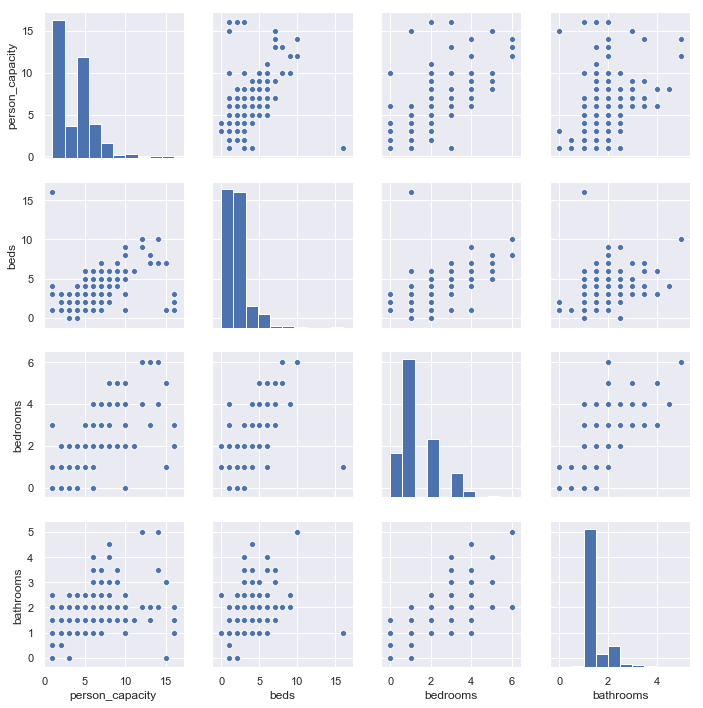

In [79]:
sns.pairplot(df[["person_capacity", "beds", "bedrooms", "bathrooms"]])

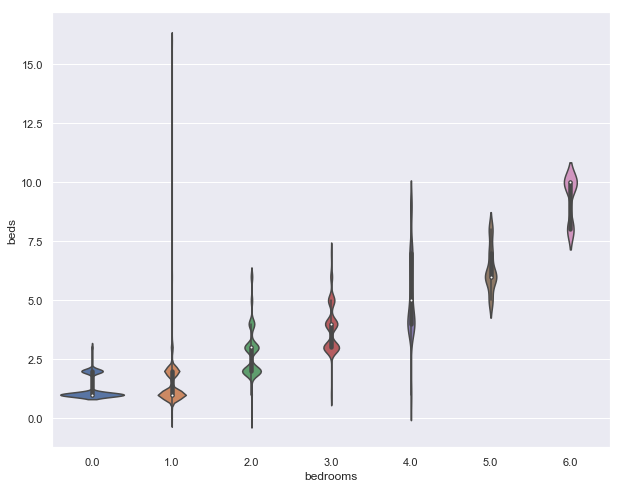

In [80]:
fig= plt.figure(figsize=(10,8))
sns.violinplot(x='bedrooms', y='beds', data=df)

### Model Selection

In [74]:
scaler = StandardScaler()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    scaler.fit_transform(df.drop('local_price',axis=1)), df.local_price, shuffle=True, train_size=0.8, random_state=42)

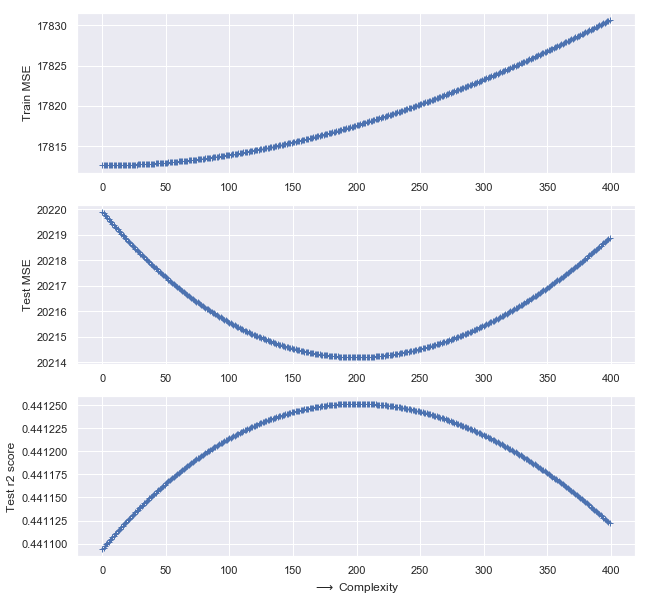

In [77]:
MSE_train=[]
MSE_test=[]
r2=[]
complexity=[]

for a in range(0,400,1):
    model=Ridge(alpha=a)
    model.fit(X_train,y_train)
    MSE_test.append(mean_squared_error(y_test, model.predict(X_test)))
    MSE_train.append(mean_squared_error(y_train, model.predict(X_train)))
    r2.append(r2_score(y_test, model.predict(X_test)))
    complexity.append(a)

fig, axs = plt.subplots(3,1,sharey=False,sharex=False,figsize=(10,10))


axs[2].set_xlabel("$\longrightarrow $ Complexity")

axs[0].set_ylabel('Train MSE')
axs[1].set_ylabel('Test MSE')
axs[2].set_ylabel('Test r2 score')

axs[0].plot(complexity[:400], MSE_train[:400], '+')
axs[1].plot(complexity[:400], MSE_test[:400],  '+')
axs[2].plot(complexity[:400], r2[:400],  '+')

In [168]:
# initialize
ridge_reg = Ridge(alpha=50)
ridge_reg.fit(X_train, y_train)
ridge_df = pd.DataFrame({'variable': df.drop('local_price',axis=1).columns})

alphas = np.arange(0, 400, 1)

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    ridge_df['a='+str(alpha)] = ridge_reg.coef_
ridge_df.set_index('variable',inplace=True)
ridge_df.tail(10)

,a=0,a=1,a=2,a=3,a=4,a=5,a=6,a=7,a=8,a=9,...,a=390,a=391,a=392,a=393,a=394,a=395,a=396,a=397,a=398,a=399
variable,,,,,,,,,,,,,,,,,,,,,
Wifi,-0.107664,-0.107108,-0.106552,-0.105997,-0.105441,-0.104886,-0.104331,-0.103776,-0.103222,-0.102668,...,0.092660,0.093135,0.093609,0.094084,0.094558,0.095032,0.095506,0.095980,0.096453,0.096927
Kitchen,-15.633428,-15.631451,-15.629475,-15.627500,-15.625525,-15.623551,-15.621579,-15.619607,-15.617636,-15.615665,...,-14.920546,-14.918854,-14.917163,-14.915473,-14.913783,-14.912094,-14.910406,-14.908718,-14.907031,-14.905344
Breakfast,2.971542,2.971884,2.972225,2.972566,2.972907,2.973247,2.973587,2.973927,2.974266,2.974605,...,3.082540,3.082773,3.083006,3.083239,3.083471,3.083703,3.083935,3.084167,3.084399,3.084630
Essentials,-6.895087,-6.895601,-6.896114,-6.896626,-6.897137,-6.897647,-6.898157,-6.898666,-6.899175,-6.899682,...,-7.045926,-7.046201,-7.046475,-7.046748,-7.047021,-7.047294,-7.047565,-7.047837,-7.048108,-7.048378
available,31.893750,31.892549,31.891347,31.890145,31.888943,31.887740,31.886537,31.885334,31.884131,31.882927,...,31.408452,31.407173,31.405894,31.404615,31.403336,31.402057,31.400777,31.399497,31.398218,31.396938
min_nights,-5.593212,-5.593237,-5.593262,-5.593287,-5.593311,-5.593335,-5.593358,-5.593382,-5.593405,-5.593427,...,-5.584184,-5.584119,-5.584054,-5.583988,-5.583922,-5.583856,-5.583790,-5.583724,-5.583658,-5.583591
week_number,-2.929606,-2.929301,-2.928996,-2.928691,-2.928386,-2.928081,-2.927776,-2.927471,-2.927167,-2.926862,...,-2.812686,-2.812392,-2.812098,-2.811804,-2.811510,-2.811216,-2.810922,-2.810628,-2.810334,-2.810040
entire_home,49.696938,-3.402226,-3.401245,-3.400266,-3.399287,-3.398309,-3.397331,-3.396354,-3.395378,-3.394402,...,-3.062910,-3.062135,-3.061360,-3.060585,-3.059811,-3.059037,-3.058263,-3.057490,-3.056718,-3.055946
private_room,54.864313,3.902118,3.902280,3.902443,3.902606,3.902768,3.902930,3.903093,3.903255,3.903416,...,3.953917,3.954023,3.954128,3.954233,3.954338,3.954443,3.954548,3.954653,3.954758,3.954862


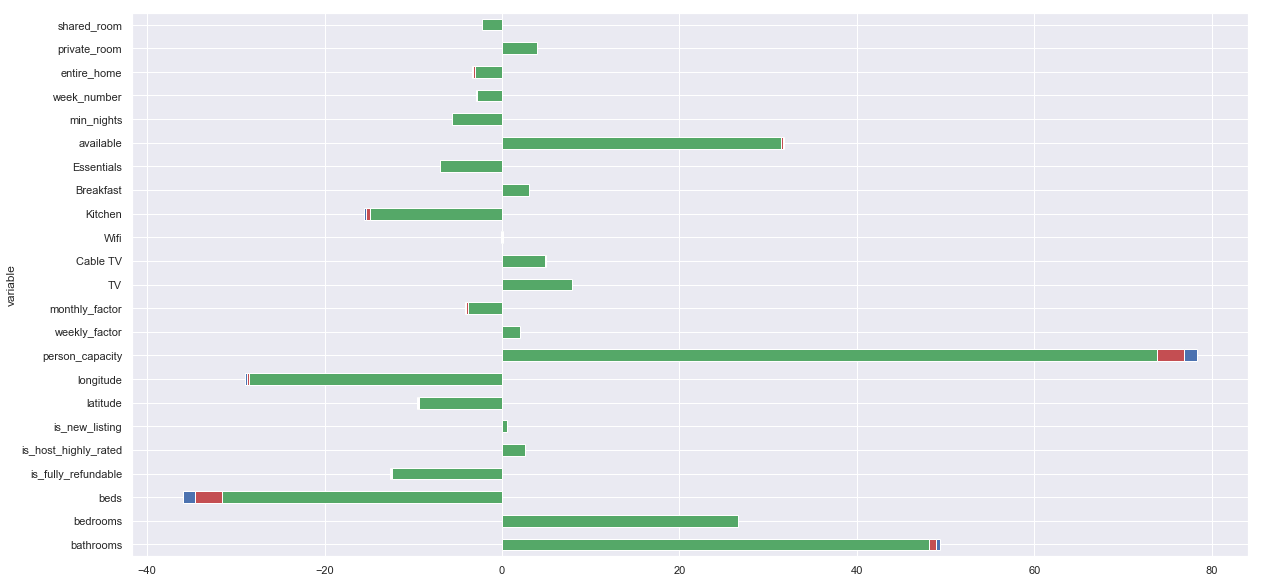

In [169]:
fig=plt.figure(figsize=(20,10))
ridge_df['a=50'].plot.barh()
ridge_df['a=150'].plot.barh(color='r')
ridge_df['a=380'].plot.barh(color='g')

In [170]:
ridge_df2=ridge_df.transpose()
ridge_df2['lambda']=ridge_df2.index
ridge_df2.reset_index(inplace=True)
ridge_df2.drop('index',axis=1,inplace=True)

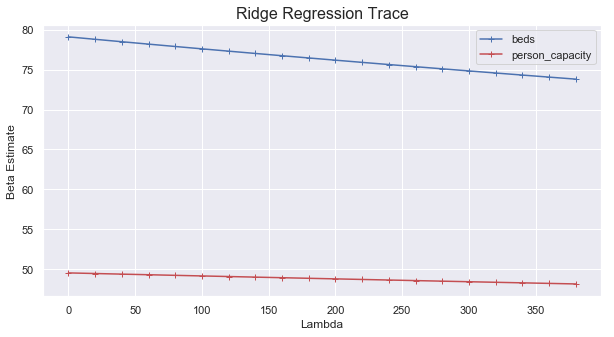

In [189]:
fig, ax = plt.subplots(figsize=(10, 5),sharex=False, sharey=False)
ax.plot(ridge_df2.person_capacity[::20],'b', ridge_df2.bathrooms[::20], 'r' ,marker='+')
#ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['beds','person_capacity','bathrooms'])
ax.grid(True)

### Model Assessment

In [209]:
def r2(rep):
    rkf= RepeatedKFold(n_splits=5, n_repeats=rep, random_state=True)
    r2=[]
    
    for train_I, test_I in rkf.split(df):
        X_fold_train = scaler.fit_transform(df.iloc[train_I, :].drop('local_price',axis=1))
        y_fold_train = df['local_price'].values[train_I]
        X_fold_test = scaler.fit_transform(df.iloc[test_I, :].drop('local_price',axis=1))
        y_fold_test = df['local_price'].values[test_I]
        model = Ridge(alpha=200)
        model.fit(X_fold_train, y_fold_train)
        r2.append(r2_score(y_fold_test, model.predict(X_fold_test)))
    print('The estimation of the r2 score over the test distributions is:', "{:2.2f}%".format(np.mean(r2)*100), '$\u00B1 $', np.std(r2))
    print("The confidence interval is [{:2.1f}%, {:2.1f}%]".format(*np.quantile(r2, q=[0.025, 0.975]) * 100))
    
    return r2

The estimation of the r2 score over the test distributions is: 47.22% $± $ 0.021291064697985272
The confidence interval is [43.0%, 51.3%]


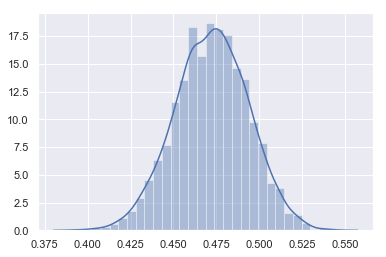

In [210]:
sns.distplot(r2(1000),bins=30)

### Intepretability 

In [220]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('local_price',axis=1), df.local_price, shuffle=True, train_size=0.8, random_state=42)

model=Ridge(alpha=200)
model.fit(scaler.fit_transform(X_train), y_train)

Ridge(alpha=200, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [221]:
perm = PermutationImportance(model, random_state=1, n_iter=10).fit(scaler.fit_transform(X_test), y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3085 ± 0.0216,person_capacity
0.1183 ± 0.0130,bathrooms
0.0710 ± 0.0060,beds
0.0607 ± 0.0117,available
0.0442 ± 0.0072,longitude
0.0346 ± 0.0066,bedrooms
0.0159 ± 0.0063,Kitchen
0.0075 ± 0.0018,latitude
0.0071 ± 0.0029,is_fully_refundable
0.0044 ± 0.0015,Essentials
